In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

sweep = []
folder = "."
id = []

#regex for finding number after "result" in file name


#loop over txt files in the current directory
for file in os.listdir(folder):
    #skip files that are not txt files
    if not file.endswith(".txt"):
        continue
    #skip files that are not result files
    if not file.startswith("result"):
        continue
    #join folder and file name
    file = os.path.join(folder, file)
    header = np.loadtxt(file, delimiter=",", max_rows=1)
    
    data = np.loadtxt(file, delimiter=",",skiprows=1)
    id.append(float(header))
    sweep.append(data)

#sort data by id
sweep = [x for _,x in sorted(zip(id,sweep))]
id.sort()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

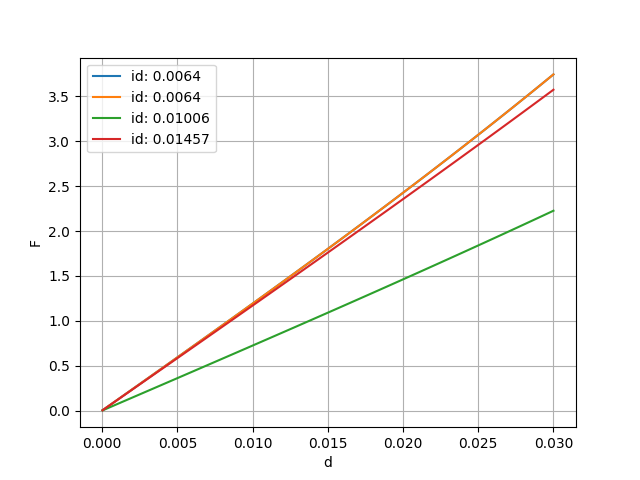

Text(0.5, 1.0, 'Force Profile serpentine')

In [3]:
#loop over sweep and plot the 2nd and 3rd columns of each data array in a new subplot
#create 3d plot
%matplotlib ipympl
fig = plt.figure()


for key,data in zip(id,sweep):
    plt.plot(data[:,1], data[:,2], label="id: "+str(key))
    #change line style for each line, dashed, dotted, solid
    

    


plt.grid()

plt.xlabel("d")
plt.ylabel("F")
plt.legend()
plt.show()
plt.title("Force Profile serpentine")


[124.854084, 124.854084, 74.225252, 119.16522033333334]


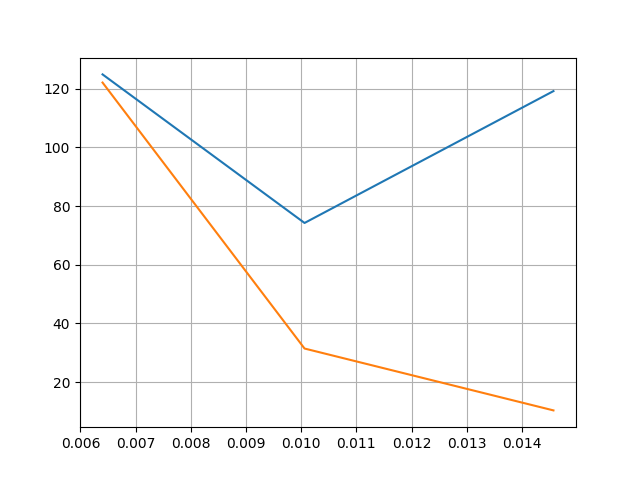

In [4]:
stiffnesses = []
for data in sweep:
    stiffnesses.append(data[-1,2]/data[-1,1])

print(stiffnesses)

flexurelengths = id

plt.figure()
plt.plot(flexurelengths, stiffnesses)
plt.grid()

E=2.2e9
t = 5e-3
w=0.4e-3
smax = 65e6
l= np.array(flexurelengths)
N=22

k = E*t*w**3/l**3/N

plt.plot(l,k)


In [5]:
#Calculating the length of the beams and the number of beams needed to for a given stiffness

E=2.2e9
t = 5e-3
w=0.8e-3
smax = 60e6

C = 130 #N/m
R = 30e-3


I = t*w**3/12

L = smax*t*w**2/3/C/R
print(f"max length: {L*1e3} mm")
# print(f"max length: {L*1e3} mm")

N = 12*E*I/L**3/C
N = np.ceil(1.3*N)
L = (12*E*I/N/C)**(1/3)
print(f"Flexure length: {L*1e3} mm")
print(f"min number of beams: {N}")
C = 12*E*I/L**3/N
print(f"stiffness: {C} N/m")
print(f"total length: {(w+0.2e-3)*N*1e3} mm")

max length: 16.41025641025641 mm
Flexure length: 14.936837187181203 mm
min number of beams: 13.0
stiffness: 129.9999999999999 N/m
total length: 13.000000000000002 mm


In [6]:
file = 'resulta.txt'
header = np.loadtxt(file, delimiter=",", max_rows=1)
data = np.loadtxt(file, delimiter=",",skiprows=1)
#find stiffness
stiffness = data[-1,2]/data[-1,1]
print(f"stiffness: {stiffness} N/m")




stiffness: 74.225252 N/m


In [7]:
file = 'resultb.txt'
header = np.loadtxt(file, delimiter=",", max_rows=1)
data = np.loadtxt(file, delimiter=",",skiprows=1)
#find stiffness
stiffness = data[-1,2]/data[-1,1]
print(f"stiffness: {stiffness} N/m")
maxforce = data[-1,2]
print(f"maxforce: {maxforce} N")



stiffness: 119.16522033333334 N/m
maxforce: 3.57495661 N


Now we calculate the buckling force of the long spring in the ReLU element, by the formula: $\frac{4\pi^2 EI}{L^2}$

In [8]:
E=2.2e9
w = 0.1e-3
L = 45e-3
t = 5e-3

I = t*w**3/12

Fb = 4*np.pi**2*E*I/L**2
print(f"buckling force: {Fb} N")

buckling force: 0.017870888627486908 N
